In [3]:
%matplotlib inline
from io import StringIO
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

mpl.rc('savefig', dpi=150)

In [23]:
# https://docs.google.com/spreadsheets/d/1c5yGydEANMzHjBufTzph0w-WGwJyiwPMRYz3yBZatb4/edit#gid=0
# Keras benchmarks, our measurements, inception3
table = StringIO("""model	method	machine	GPUs	PS	images/sec	speedup	efficiency
inception3	tf_cnn_benchmarks	az-4x-m60	1	gpu	44.92	1.000	100.00
inception3	tf_cnn_benchmarks	az-4x-m60	2	cpu	91.44	2.036	101.78
inception3	tf_cnn_benchmarks	az-4x-m60	3	cpu	127.33	2.835	94.49
inception3	tf_cnn_benchmarks	az-4x-m60	4	cpu	173.5	3.862	96.56
inception3	keras_avolkov1	az-4x-m60	1	gpu	29.36	1.000	100.00
inception3	keras_avolkov1	az-4x-m60	2	cpu	53.16	1.811	90.55
inception3	keras_avolkov1	az-4x-m60	2	gpu	50.52	1.721	86.05
inception3	keras_avolkov1	az-4x-m60	3	cpu	64.17	2.186	72.87
inception3	keras_avolkov1	az-4x-m60	3	gpu	60.33	2.055	68.51
inception3	keras_avolkov1	az-4x-m60	4	cpu	75.51	2.572	64.31
inception3	keras_avolkov1	az-4x-m60	4	gpu	64.67	2.203	55.08
inception3	keras_avolkov1	az-2x-m60	1	GPU	31.67	1.00	100.00
inception3	keras_avolkov1	az-2x-m60	2	CPU	54.58	1.72	86.17
inception3	keras_avolkov1	az-2x-m60	2	GPU	53.20	1.68	83.99
inception3	keras_avolkov1	7gforce	1	GPU	41	1.00	100.00
inception3	keras_avolkov1	7gforce	2	CPU	50.1	1.22	61.10
inception3	keras_avolkov1	7gforce	4	CPU	64.05	1.56	39.05
inception3	keras_avolkov1	7gforce	6	CPU	65.37	1.59	26.57
inception3	keras_avolkov1	7gforce	2	GPU	55.57	1.36	67.77
inception3	keras_avolkov1	7gforce	4	GPU	32.23	0.79	19.65
inception3	keras_avolkov1	7gforce	6	GPU	21.33	0.52	8.67
inception3	tf_cnn_benchmarks	az-2x-m60	1	GPU	47.49	1.00	100.00
inception3	tf_cnn_benchmarks	az-2x-m60	2	CPU	95.43	2.01	100.47
inception3	tf_cnn_benchmarks	az-2x-m60	2	GPU	94.72	1.99	99.73
inception3	tf_cnn_benchmarks	7gforce	1	GPU	78.44	1.00	100.00
inception3	tf_cnn_benchmarks	7gforce	2	CPU	118.32	1.51	75.42
inception3	tf_cnn_benchmarks	7gforce	4	CPU	236.86	3.02	75.49
inception3	tf_cnn_benchmarks	7gforce	6	CPU	351.98	4.49	74.79
inception3	tf_cnn_benchmarks	7gforce	2	GPU	126.68	1.61	80.75
inception3	tf_cnn_benchmarks	7gforce	4	GPU	180.92	2.31	57.66
inception3	tf_cnn_benchmarks	7gforce	6	GPU	NaN	NaN	NaN
""")
df = pd.read_csv(table, sep='\t')

In [24]:
df['PS'] = df['PS'].apply(str.upper)
df

,model,method,machine,GPUs,PS,images/sec,speedup,efficiency
0,inception3,tf_cnn_benchmarks,az-4x-m60,1,GPU,44.92,1.000,100.00
1,inception3,tf_cnn_benchmarks,az-4x-m60,2,CPU,91.44,2.036,101.78
2,inception3,tf_cnn_benchmarks,az-4x-m60,3,CPU,127.33,2.835,94.49
3,inception3,tf_cnn_benchmarks,az-4x-m60,4,CPU,173.50,3.862,96.56
4,inception3,keras_avolkov1,az-4x-m60,1,GPU,29.36,1.000,100.00
5,inception3,keras_avolkov1,az-4x-m60,2,CPU,53.16,1.811,90.55
6,inception3,keras_avolkov1,az-4x-m60,2,GPU,50.52,1.721,86.05
7,inception3,keras_avolkov1,az-4x-m60,3,CPU,64.17,2.186,72.87
8,inception3,keras_avolkov1,az-4x-m60,3,GPU,60.33,2.055,68.51
9,inception3,keras_avolkov1,az-4x-m60,4,CPU,75.51,2.572,64.31


In [9]:
def select(model, method, machine, ps):
    return df[(df['model']==model) & (df['method']==method) & (df['machine']==machine) & ((df['PS']==ps) | (df['GPUs']==1))]

In [26]:
def plot_table(model, method, ps, metric):
    fig = plt.figure()
    title = '%s - %s/imagenet-synth - PS=%s - %s' % (method, model, ps, metric)
    plt.suptitle(title)
    plt.xlabel('number of GPUs')
    plt.ylabel(metric)
    gpu_count = df['GPUs'].max()
    x_ideal = 1+np.arange(gpu_count)
    if metric == 'speedup':
        y_ideal = 1+np.arange(gpu_count)
    elif metric == 'efficiency':
        y_ideal = 100 * np.ones(gpu_count) # %
    plt.bar(x_ideal, y_ideal, alpha=0.25, label='ideal')
    d = select(model, method, 'az-4x-m60', ps)
    plt.plot(d['GPUs'], d[metric], 'o-', label='az-4x-m60')
    d = select(model, method, '7gforce', ps)
    plt.plot(d['GPUs'], d[metric], 'o-', label='7gforce')
    plt.grid(True)
    plt.legend()
    plt.savefig('%s_%s_%s.png' % (model, method, metric))

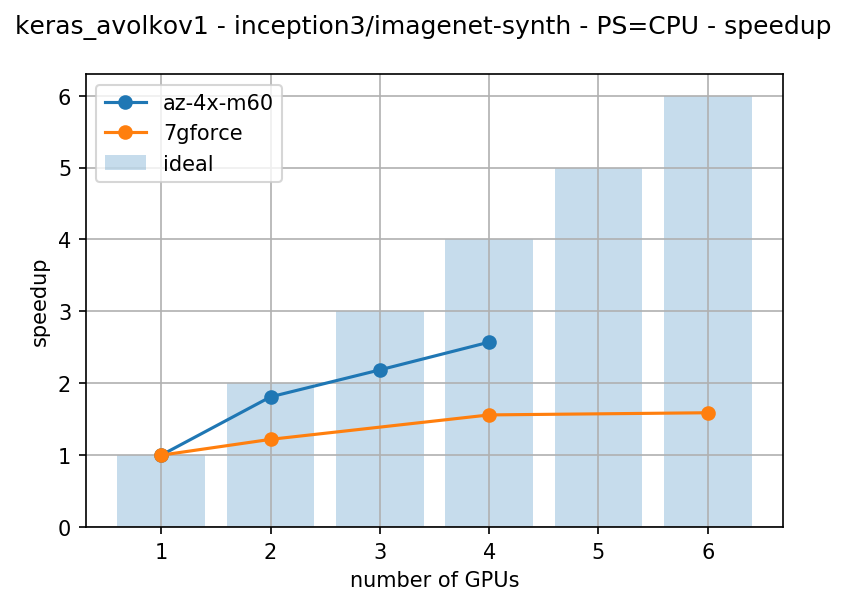

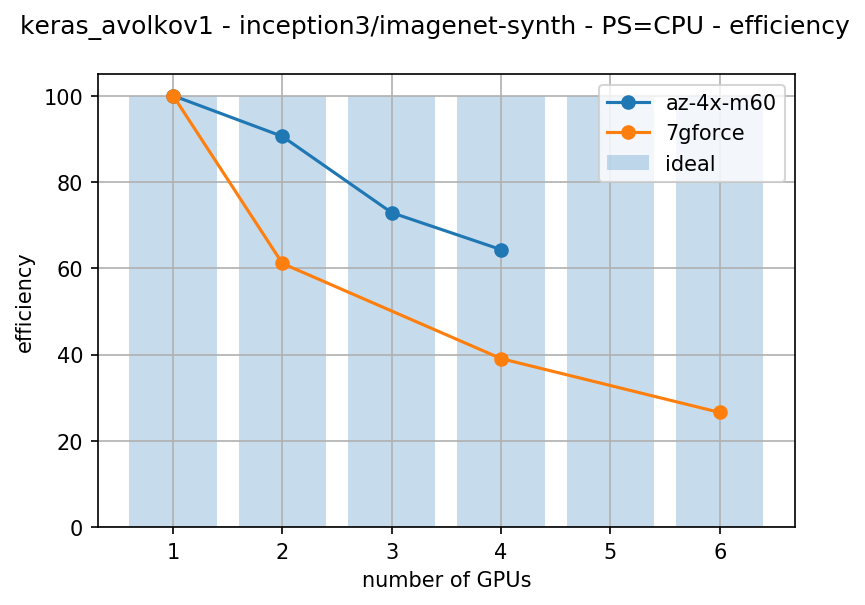

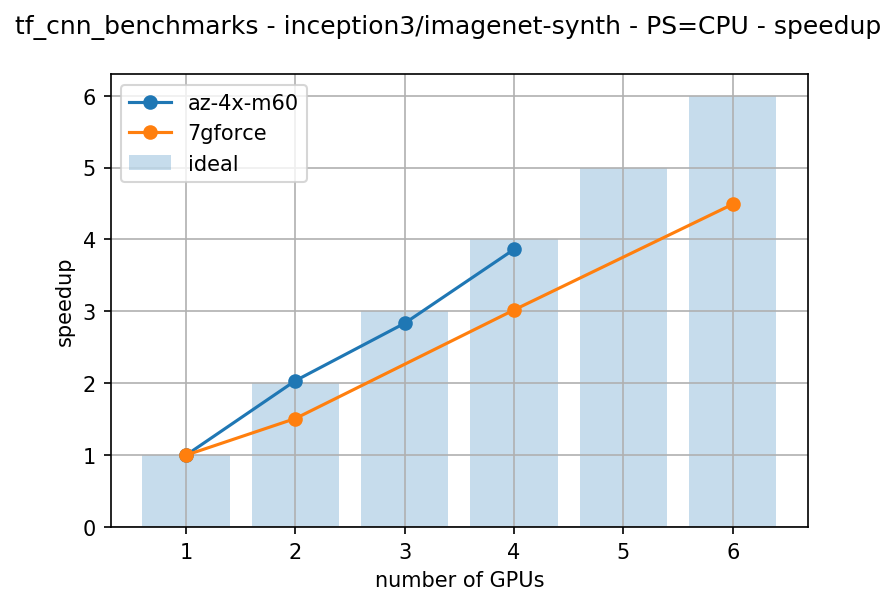

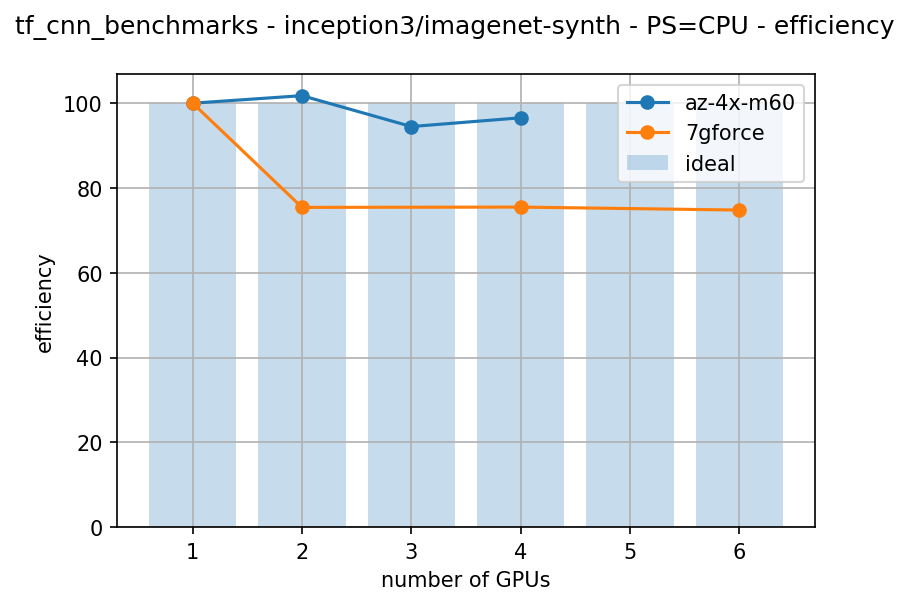

In [27]:
for model in ['inception3']:
    for method in ['keras_avolkov1', 'tf_cnn_benchmarks']:
        for metric in ['speedup', 'efficiency']:
            plot_table(model, method, 'CPU', metric)

In [37]:
def plot_comparison_table(model, metric, machine, ps_options=['CPU', 'GPU'], methods=['tf_cnn_benchmarks', 'keras_avolkov1']):
    fig = plt.figure(figsize=(8, 6))
    title = '%s/imagenet-synth - %s - %s' % (model, machine, metric)
    plt.suptitle(title)
    plt.xlabel('number of GPUs')
    plt.ylabel(metric)
    gpu_count = df['GPUs'].max()
    x_ideal = 1+np.arange(gpu_count)
    if metric == 'speedup':
        y_ideal = 1+np.arange(gpu_count)
    elif metric == 'efficiency':
        y_ideal = 100 * np.ones(gpu_count) # %
    plt.bar(x_ideal, y_ideal, alpha=0.25, label='ideal')
    for method in methods:
        for ps in ps_options:
            d = select(model, method, machine, ps)
            ls = 'o-' if ps == 'CPU' else 'x:'
            if len(d) > 1:
                plt.plot(d['GPUs'], d[metric], ls, label='%s, PS=%s' % (method, ps))
    plt.grid(True)
    plt.legend()
    plt.savefig('comparison_%s_%s_%s.png' % (model, machine, metric))

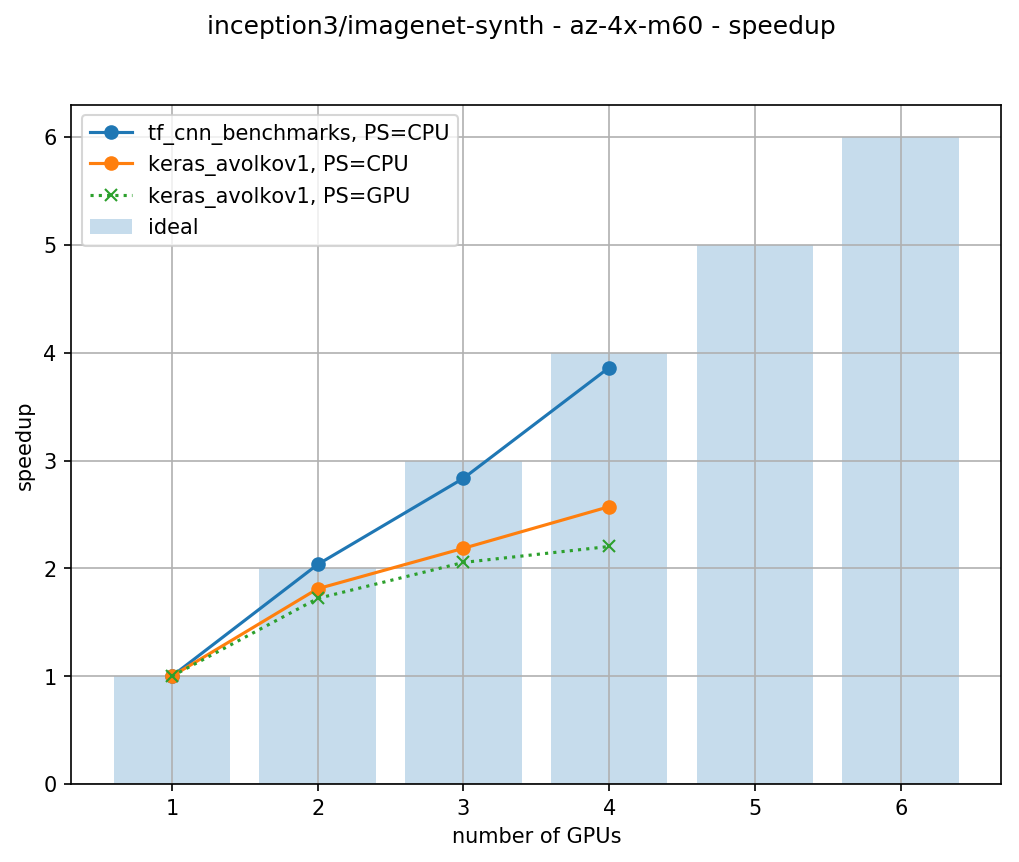

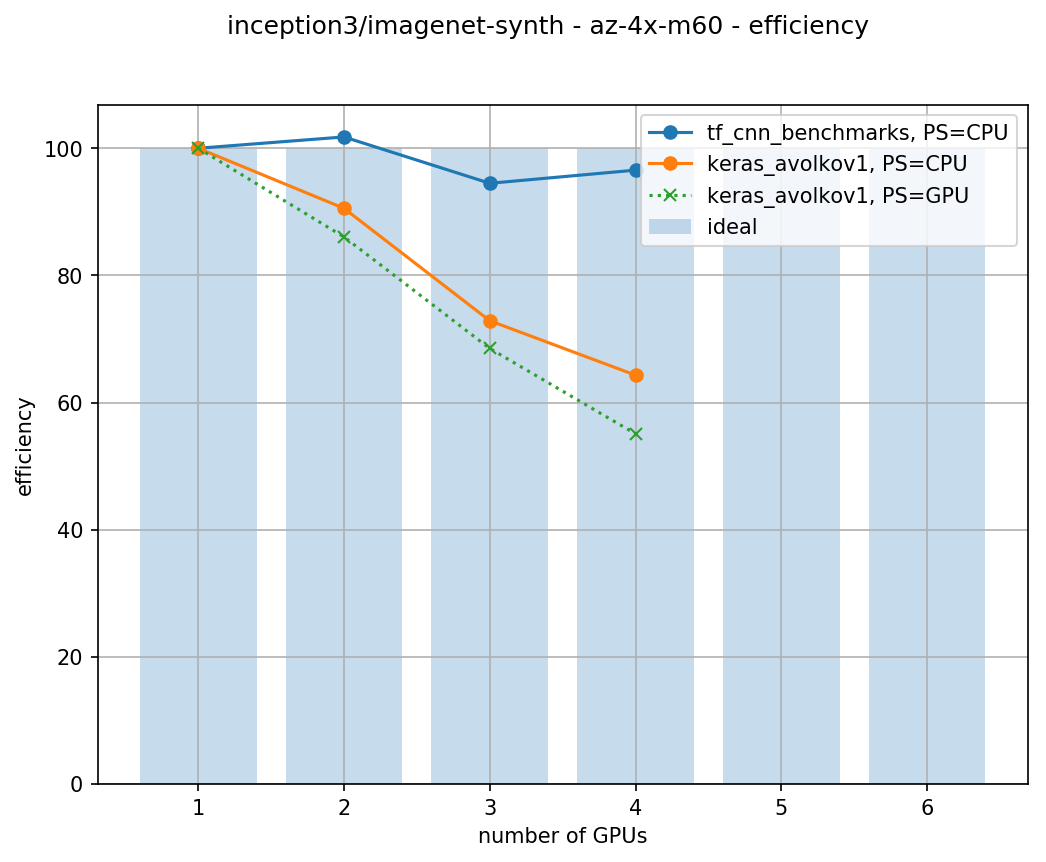

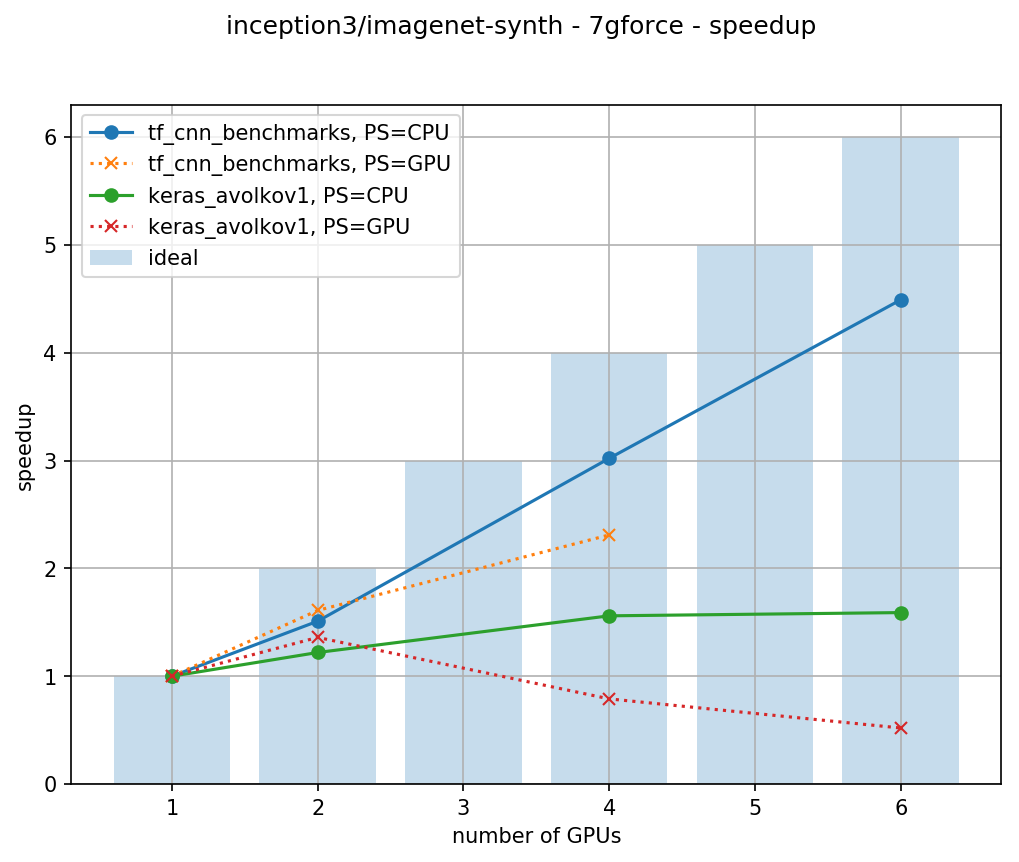

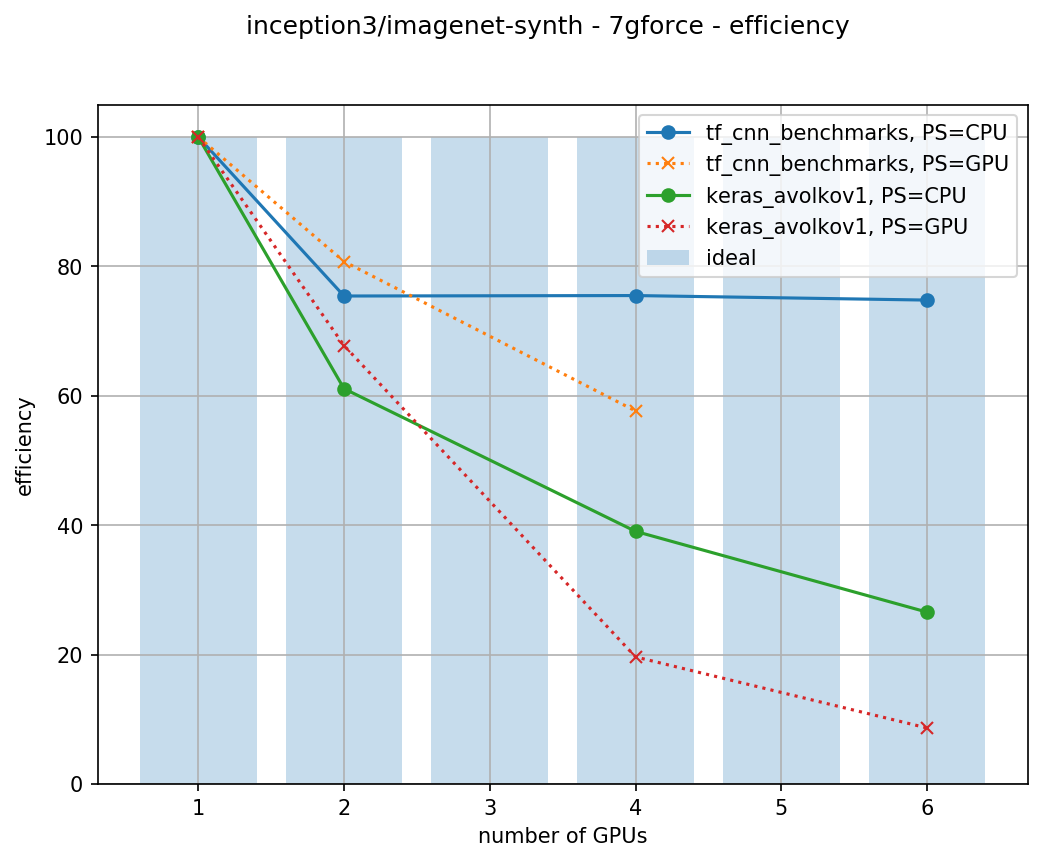

In [38]:
for model in ['inception3']:
    for machine in ['az-4x-m60', '7gforce']:
        for metric in ['speedup', 'efficiency']:
            plot_comparison_table(model, metric, machine)

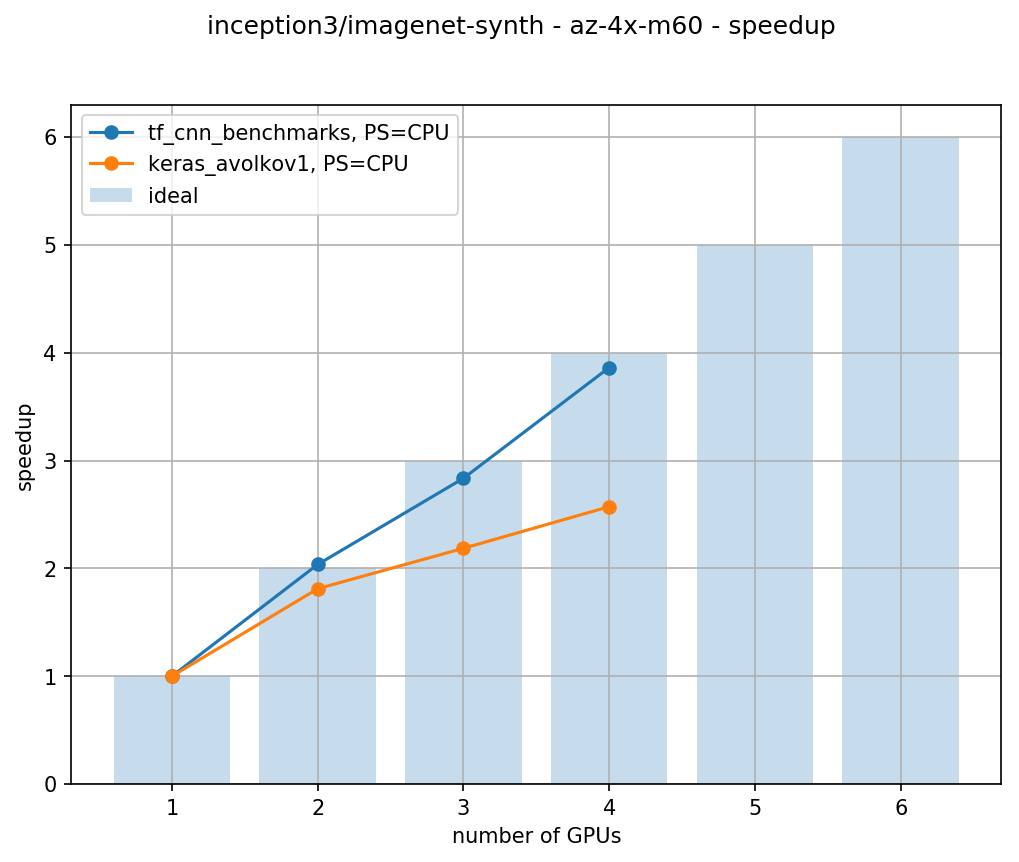

In [40]:
plot_comparison_table('inception3', 'speedup', 'az-4x-m60', ps_options=['CPU'])

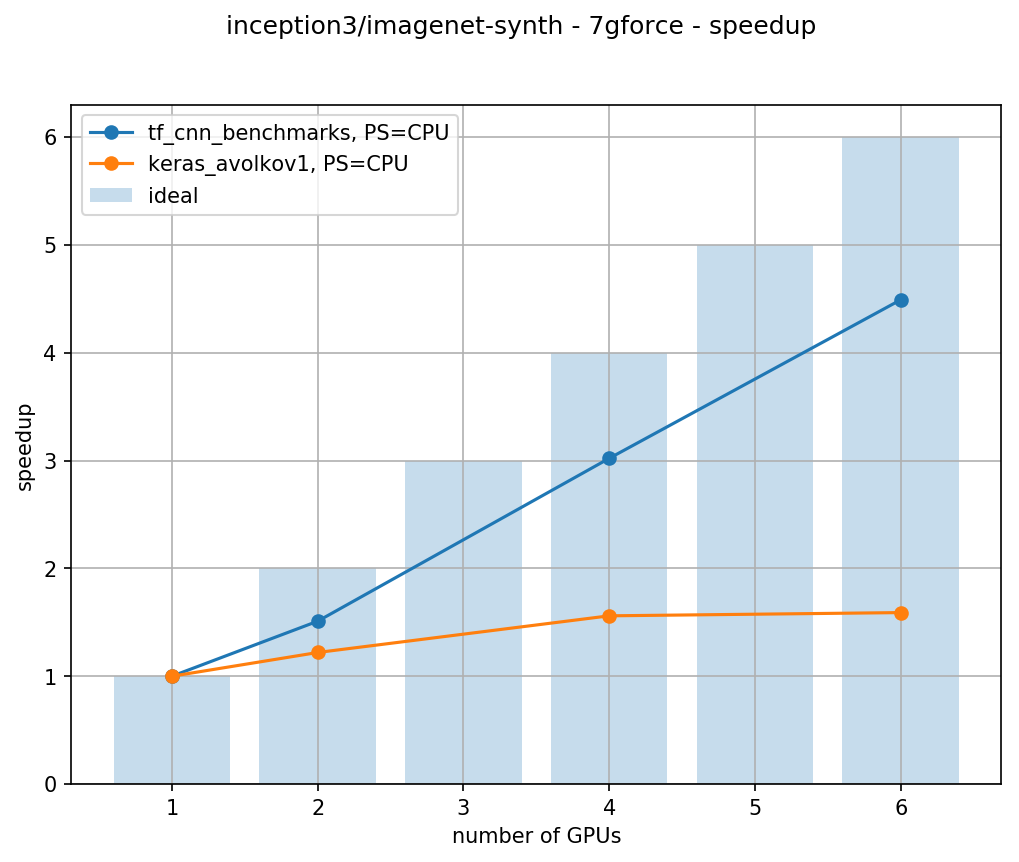

In [41]:
plot_comparison_table('inception3', 'speedup', '7gforce', ps_options=['CPU'])

In [58]:
def plot_overall_comparison_table(model, metric, ps='CPU'):
    machines = ['az-4x-m60', '7gforce']
    methods=['tf_cnn_benchmarks', 'keras_avolkov1']
    
    fig = plt.figure(figsize=(8, 6))
    title = '%s/imagenet-synth - %s, PS=%s' % (model, metric, ps)
    plt.suptitle(title)
    plt.xlabel('number of GPUs')
    plt.ylabel(metric)
    gpu_count = df['GPUs'].max()
    x_ideal = 1+np.arange(gpu_count)
    if metric == 'speedup':
        y_ideal = 1+np.arange(gpu_count)
    elif metric == 'efficiency':
        y_ideal = 100 * np.ones(gpu_count) # %
    plt.bar(x_ideal, y_ideal, alpha=0.25, label='ideal')
    for machine, ls in zip(machines, ['-', ':']):
        for method, color in zip(methods, ['#ef6c00', '#d00000']):
            d = select(model, method, machine, ps)
            if len(d) > 1:
                plt.plot(d['GPUs'], d[metric], color=color, ls=ls, marker='o', label='%s, %s' % (machine, method))
    plt.grid(True)
    plt.legend()
    plt.savefig('overall_comparison_%s_%s_%s.png' % (model, machine, metric))

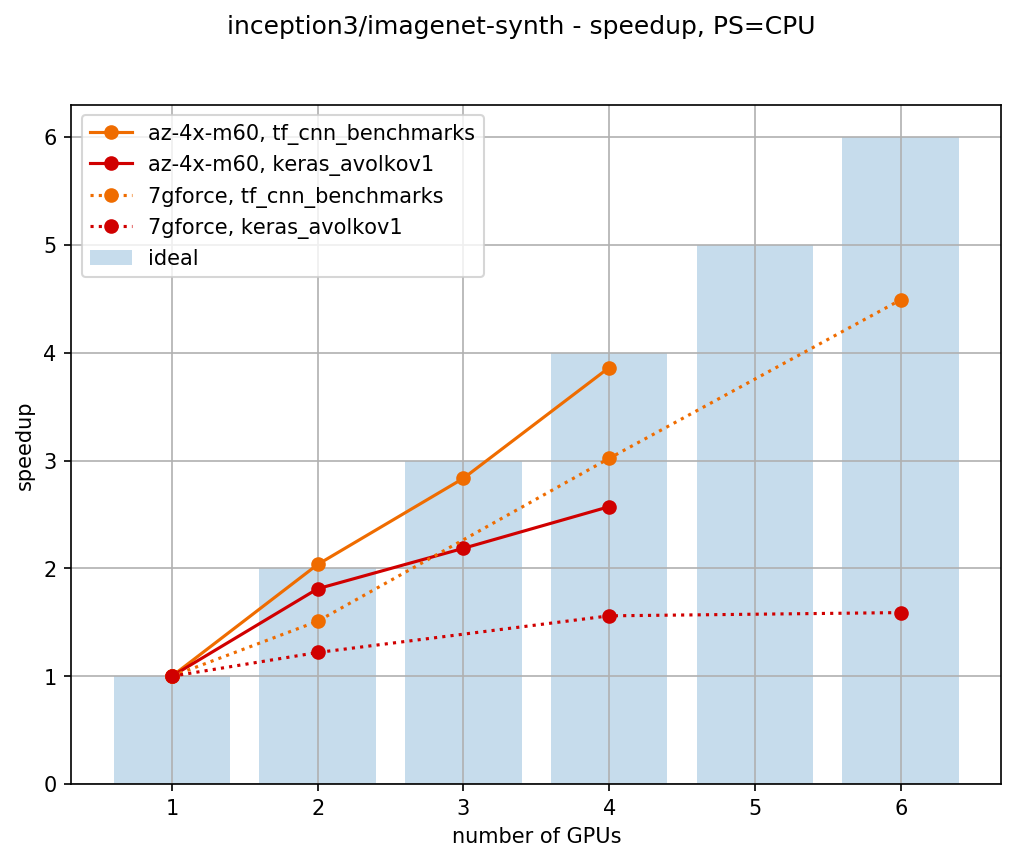

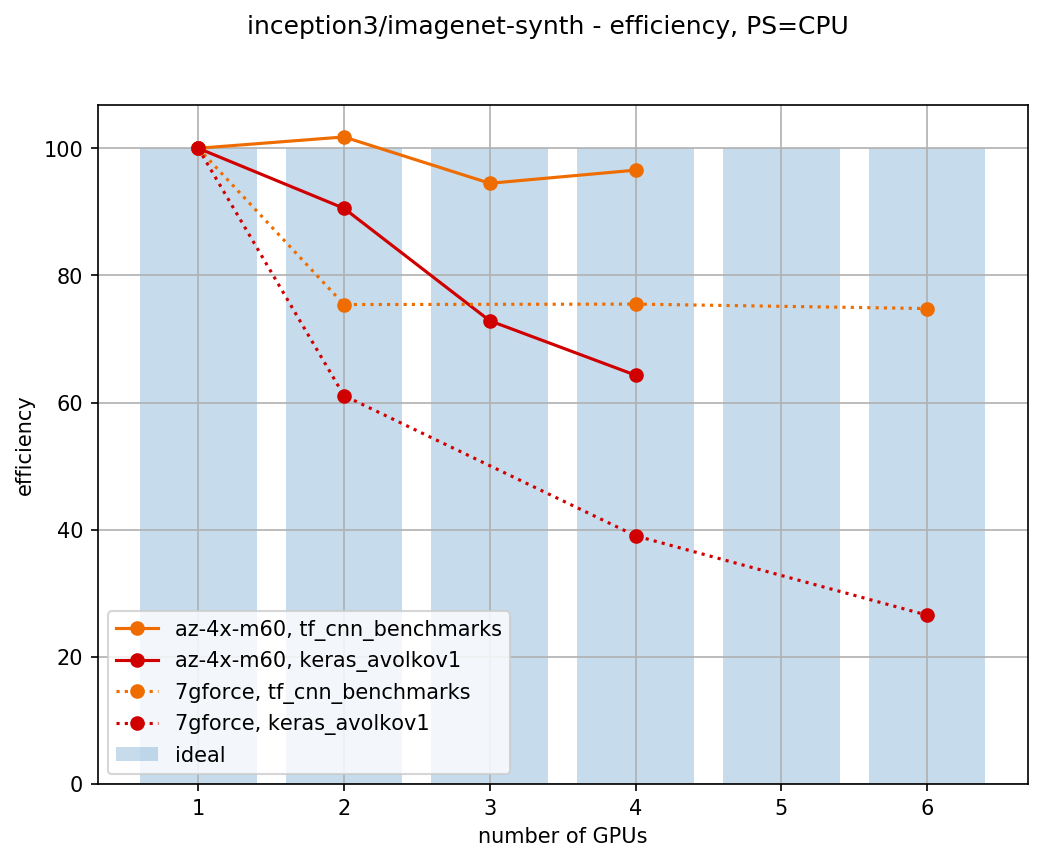

In [59]:
for model in ['inception3']:
    for metric in ['speedup', 'efficiency']:
        plot_overall_comparison_table(model, metric, ps='CPU')